In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

df = pd.read_csv("/content/Student_performance_data _ (1).csv")
df.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:

print("Missing values:", df.isnull().sum().sum())
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


Missing values: 0


In [4]:

df['EngagementScore'] = df[['StudyTimeWeekly', 'ParentalSupport', 'Extracurricular',
                            'Sports', 'Music', 'Volunteering']].sum(axis=1)
df['EngagementLevel'] = pd.cut(df['EngagementScore'],
                               bins=[0, 10, 20, df['EngagementScore'].max()],
                               labels=['Low', 'Medium', 'High'])


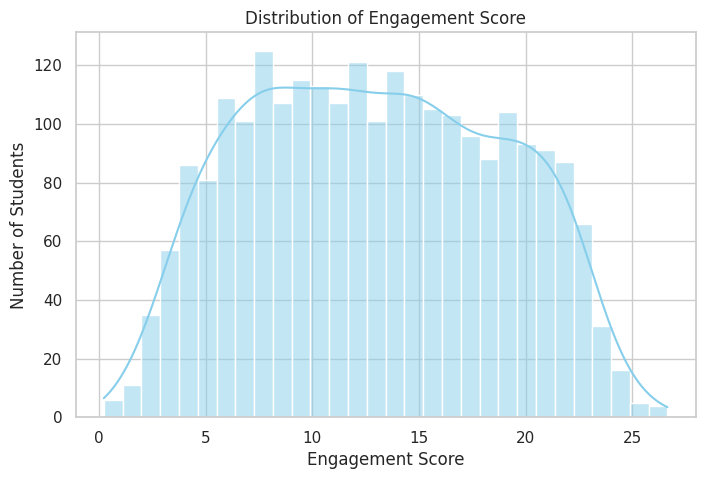

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['EngagementScore'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Engagement Score')
plt.xlabel('Engagement Score')
plt.ylabel('Number of Students')
plt.show()


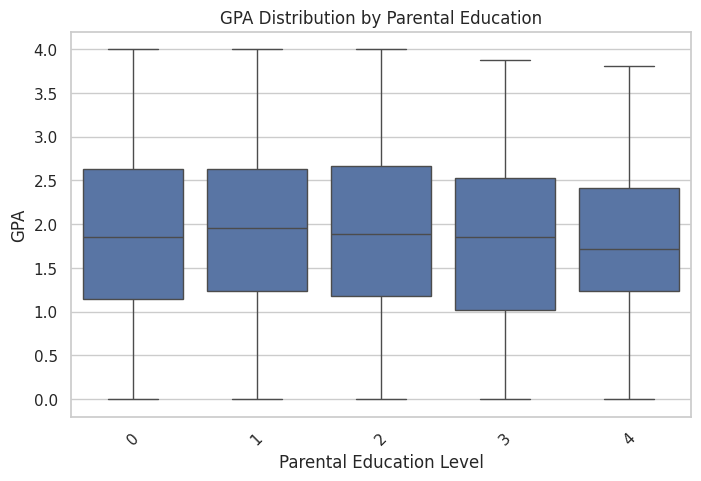

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(x='ParentalEducation', y='GPA', data=df)
plt.title('GPA Distribution by Parental Education')
plt.xlabel('Parental Education Level')
plt.ylabel('GPA')
plt.xticks(rotation=45)
plt.show()


<ipython-input-7-de8349b8f6f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EngagementLevel', y='GPA', data=df, palette='viridis')


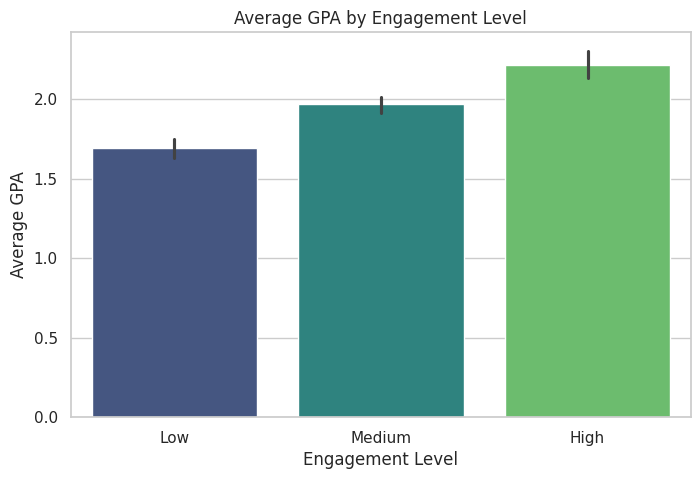

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(x='EngagementLevel', y='GPA', data=df, palette='viridis')
plt.title('Average GPA by Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Average GPA')
plt.show()


In [10]:
corr = df.corr(numeric_only=True)  # Use only numeric columns (for pandas >= 1.5)

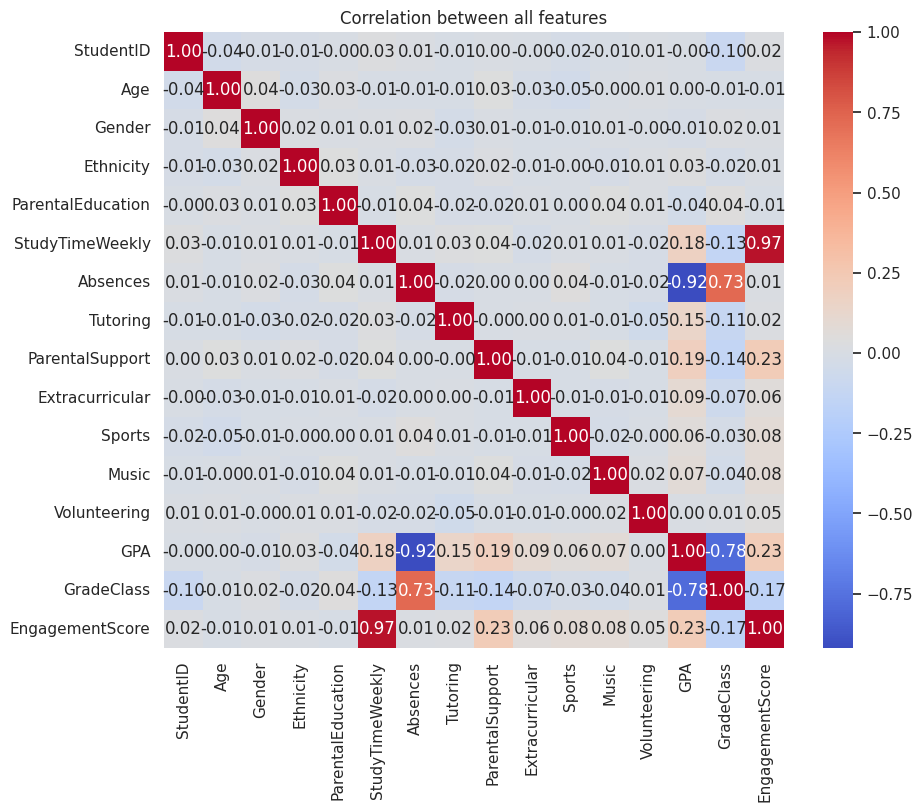

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame
# df = pd.read_csv('your_data.csv')  # if you are using real data

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between all features')
plt.show()

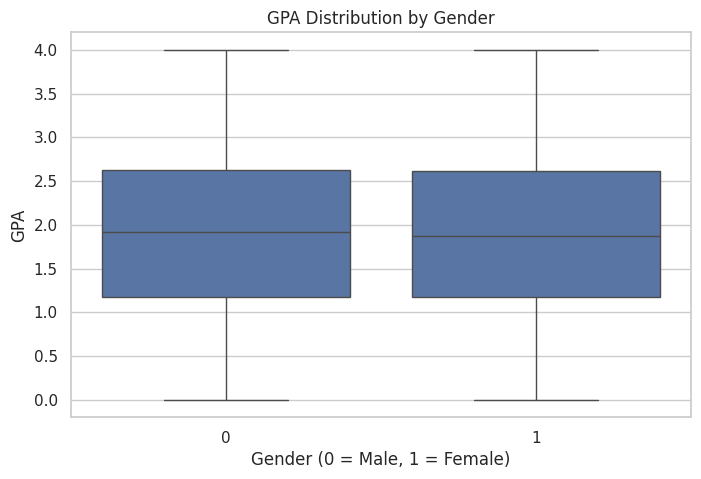

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender', y='GPA', data=df)
plt.title('GPA Distribution by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('GPA')
plt.show()

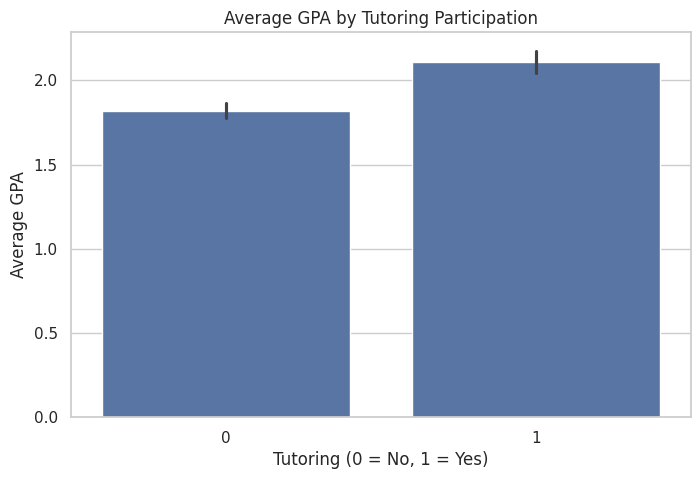

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x='Tutoring', y='GPA', data=df)
plt.title('Average GPA by Tutoring Participation')
plt.xlabel('Tutoring (0 = No, 1 = Yes)')
plt.ylabel('Average GPA')
plt.show()